In [23]:
import pandas as pd

csv = pd.read_csv('results2.csv')
csv

,TimeSeries Dataset,Model,NoiseType,NoiseVol,Lr,hd_bites,MAE
0,SanFranciscoTraffic,RegHD,None,0.0,0.00001,1,0.146986
1,SanFranciscoTraffic,KalmanFilter,None,0.0,0.01500,1,0.161418
2,SanFranciscoTraffic,ARHD,None,0.0,0.10000,1,0.144250
3,SanFranciscoTraffic,ARHD,None,0.0,0.01000,1,0.142922
4,SanFranciscoTraffic,ARHD,None,0.0,0.00100,1,0.152187
...,...,...,...,...,...,...,...
224,EnergyConsumptionFraunhofer,KalmanFilter,Missing,0.5,0.01500,1,0.127438
225,EnergyConsumptionFraunhofer,ARHD,Missing,0.5,0.01000,4,0.126992
226,ElectricityLoadDiagrams,RegHD,Missing,0.5,0.00001,1,0.162130
227,ElectricityLoadDiagrams,KalmanFilter,Missing,0.5,0.01500,1,0.077190


In [20]:
original = csv[(csv['Model'] == 'KalmanFilter') & (csv['NoiseType'] == 'None')]
original

,TimeSeries Dataset,Model,NoiseType,NoiseVol,Lr,hd_bites,MAE
1,SanFranciscoTraffic,KalmanFilter,None,0.0,0.015,1,0.161418
23,MetroInterstateTrafficVolume,KalmanFilter,None,0.0,0.015,1,0.082901
45,GuangzhouTraffic,KalmanFilter,None,0.0,0.015,1,0.108292
66,EnergyConsumptionFraunhofer,KalmanFilter,None,0.0,0.015,1,0.117082
88,ElectricityLoadDiagrams,KalmanFilter,None,0.0,0.015,1,0.065099


In [18]:
original_regHD = {}

for i in range(len(original)):
    row = original.iloc[i]
    original_regHD[row['TimeSeries Dataset']] = row['MAE']

In [21]:
original_KF = {}

for i in range(len(original)):
    row = original.iloc[i]
    original_KF[row['TimeSeries Dataset']] = row['MAE']

In [22]:
print(original_regHD)
print(original_KF)

{'SanFranciscoTraffic': 0.1469861957386862, 'MetroInterstateTrafficVolume': 0.073020765708945, 'GuangzhouTraffic': 0.1131857501319033, 'EnergyConsumptionFraunhofer': 0.1342721851311, 'ElectricityLoadDiagrams': 0.1021886961707757}
{'SanFranciscoTraffic': 0.161418219839664, 'MetroInterstateTrafficVolume': 0.082900643721638, 'GuangzhouTraffic': 0.1082922806285127, 'EnergyConsumptionFraunhofer': 0.117082020341099, 'ElectricityLoadDiagrams': 0.0650992433057082}


In [24]:
datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic', 'EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

original_ARHD = {}

for dataset in datasets:
    if dataset == "SanFranciscoTraffic":
        learning_rate=0.01
        hd_representation=4
    elif dataset == "MetroInterstateTrafficVolume":
        learning_rate=0.1
        hd_representation=2
    elif dataset == "GuangzhouTraffic":
        learning_rate=0.01
        hd_representation=4
    elif dataset == "EnergyConsumptionFraunhofer":
        learning_rate=0.01
        hd_representation=4
    elif dataset == "ElectricityLoadDiagrams":
        learning_rate=0.01
        hd_representation=1

    original = csv[(csv['Model'] == 'ARHD') & (csv['NoiseType'] == 'None') & (csv['Lr'] == learning_rate) & (csv['hd_bites'] == hd_representation)]

    original_ARHD[dataset] = original.iloc[0]['MAE']

original_ARHD


{'SanFranciscoTraffic': 0.1411786937955961,
 'MetroInterstateTrafficVolume': 0.1454261232941496,
 'GuangzhouTraffic': 0.1411786937955961,
 'EnergyConsumptionFraunhofer': 0.1411786937955961,
 'ElectricityLoadDiagrams': 0.1429223478834079}

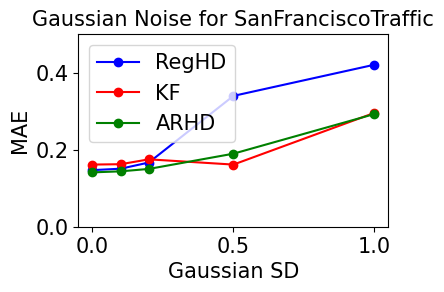

<Figure size 640x480 with 0 Axes>

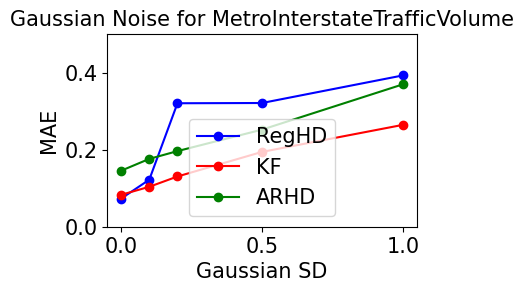

<Figure size 640x480 with 0 Axes>

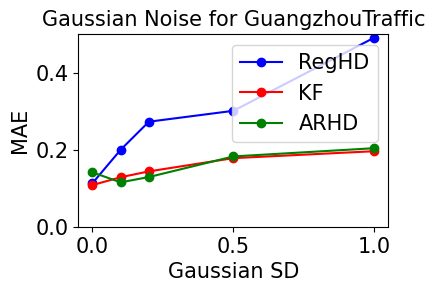

<Figure size 640x480 with 0 Axes>

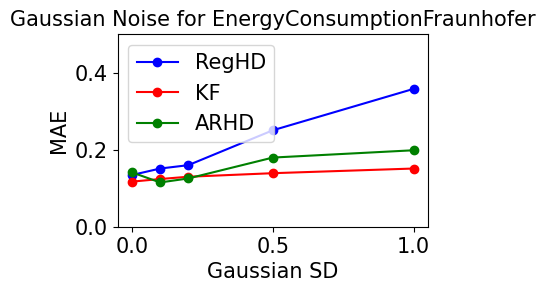

<Figure size 640x480 with 0 Axes>

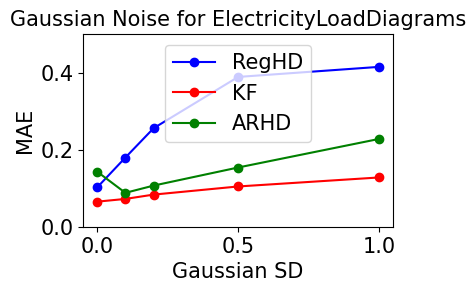

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic', 'EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

missing_df = csv[(csv['NoiseType'] == 'Gaussian')]

for dataset in datasets:

    ac_RegHD = [original_regHD[dataset]]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(RegHD)):
        row = RegHD.iloc[i]
        ac_RegHD.append(row['MAE'])

    ac_KalmanFilter = [original_KF[dataset]]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter.append(row['MAE'])

    ac_ARHD = [original_ARHD[dataset]]

    ARHD = missing_df[(missing_df['Model'] == 'ARHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD.append(row['MAE'])

    fig = plt.figure(figsize=(4,2.5))
    ax = fig.add_subplot(111)

    labels = [0, 0.1, 0.2, 0.5, 1]

    plt.plot(labels, ac_RegHD, 'b-o', label=r"RegHD")
    plt.plot(labels, ac_KalmanFilter, 'r-o', label=r"KF")
    plt.plot(labels, ac_ARHD, 'g-o', label=r"ARHD")

    plt.legend(fontsize="15")

    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.set_xlabel(r'Gaussian SD', size=15)
    ax.set_ylabel('MAE', size=15)

    plt.ylim([0, 0.5])

    plt.title(f"Gaussian Noise for {dataset}", fontsize = 15)

    plt.savefig(f"Results_Gaussian_{dataset}.png", bbox_inches="tight")
    plt.show()
    plt.clf()

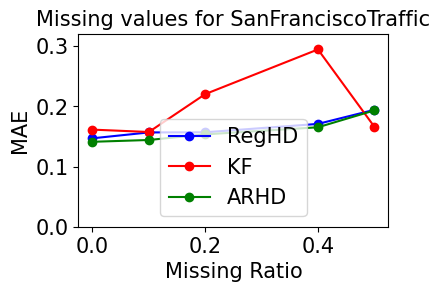

<Figure size 640x480 with 0 Axes>

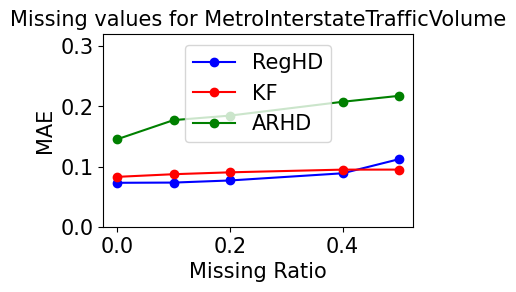

<Figure size 640x480 with 0 Axes>

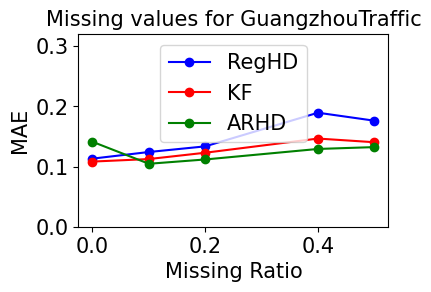

<Figure size 640x480 with 0 Axes>

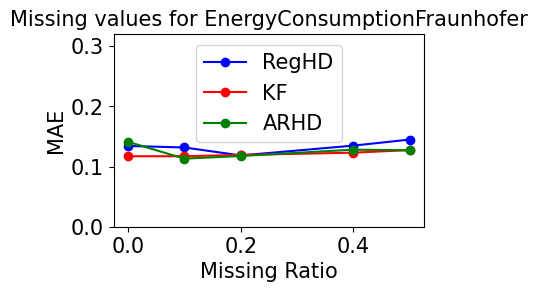

<Figure size 640x480 with 0 Axes>

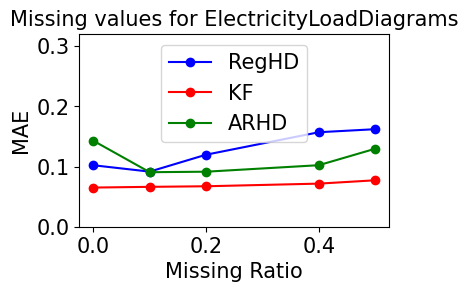

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

datasets = ['SanFranciscoTraffic','MetroInterstateTrafficVolume', 'GuangzhouTraffic', 'EnergyConsumptionFraunhofer', 'ElectricityLoadDiagrams']

missing_df = csv[(csv['NoiseType'] == 'Missing')]

for dataset in datasets:

    ac_RegHD = [original_regHD[dataset]]

    RegHD = missing_df[(missing_df['Model'] == 'RegHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(RegHD)):
        row = RegHD.iloc[i]
        ac_RegHD.append(row['MAE'])

    ac_KalmanFilter = [original_KF[dataset]]

    KF = missing_df[(missing_df['Model'] == 'KalmanFilter') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(KF)):
        row = KF.iloc[i]
        ac_KalmanFilter.append(row['MAE'])

    ac_ARHD = [original_ARHD[dataset]]

    ARHD = missing_df[(missing_df['Model'] == 'ARHD') & (missing_df['TimeSeries Dataset'] == dataset)]

    for i in range(len(ARHD)):
        row = ARHD.iloc[i]
        ac_ARHD.append(row['MAE'])

    fig = plt.figure(figsize=(4,2.5))
    ax = fig.add_subplot(111)

    labels = [0, 0.1, 0.2, 0.4, 0.5]

    plt.plot(labels, ac_RegHD, 'b-o', label=r"RegHD")
    plt.plot(labels, ac_KalmanFilter, 'r-o', label=r"KF")
    plt.plot(labels, ac_ARHD, 'g-o', label=r"ARHD")

    plt.legend(fontsize="15")

    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.set_xlabel(r'Missing Ratio', size=15)
    ax.set_ylabel('MAE', size=15)

    plt.ylim([0, 0.32])

    plt.title(f"Missing values for {dataset}", fontsize = 15)

    plt.savefig(f"Results_Missing_{dataset}.png", bbox_inches="tight")
    plt.show()
    plt.clf()